In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\Vedika\Downloads\airquality1.csv')

In [3]:
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,high
2,3,12.0,149.0,12.6,74,5,3,high
3,4,18.0,313.0,11.5,62,5,4,high
4,5,NaN,NaN,14.3,56,5,5,high
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,high
149,150,NaN,145.0,13.2,77,9,27,high
150,151,14.0,191.0,14.3,75,9,28,high
151,152,18.0,131.0,8.0,76,9,29,high


In [4]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,high
2,3,12.0,149.0,12.6,74,5,3,high
3,4,18.0,313.0,11.5,62,5,4,high
4,5,NaN,NaN,14.3,56,5,5,high


In [5]:
data.shape

(153, 8)

In [6]:
data = data.drop('Unnamed: 0', axis = 1)

In [7]:
data.isnull()

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
148,False,False,False,False,False,False,False
149,True,False,False,False,False,False,False
150,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
humidity     4
dtype: int64

In [9]:
data['Ozone'] = data['Ozone'].fillna(data['Ozone'].mean())

In [10]:
data.isnull().sum()

Ozone       0
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
humidity    4
dtype: int64

In [11]:
data['Solar.R'] = data['Solar.R'].fillna(data['Solar.R'].mean())

In [12]:
data.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
humidity    4
dtype: int64

In [13]:
subset1 = data.loc[0:5,['Ozone']]
subset2 = data.loc[0:10,['humidity','Ozone']]

In [14]:
subset1.shape

(6, 1)

In [15]:
subset2.shape

(11, 2)

merge = subset2.merge(subset1)

In [16]:
merge = subset2.merge(subset1)

In [17]:
merge.shape

(7, 2)

In [18]:
from sklearn import preprocessing 

In [19]:
pre = preprocessing.LabelEncoder()

In [20]:
B = data

In [21]:
B['humidity'] = pre.fit_transform(B['humidity'])

In [23]:
x = data[['Ozone']]
y = data[['Temp']]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [26]:
len(x_train)

122

In [27]:
len(y_train)

122

In [28]:
len(x_test)

31

In [29]:
len(y_test)

31

In [30]:
from sklearn import linear_model , metrics

In [31]:
reg = linear_model.LinearRegression()

In [32]:
model = reg.fit(x_train, y_train)

In [33]:
model.intercept_

array([68.96913912])

In [34]:
model.coef_

array([[0.21416097]])

In [35]:
y_predict = model.predict(x_test)

In [36]:
y_predict

array([[89.74275313],
       [92.09852379],
       [81.6046363 ],
       [75.60812916],
       [73.2523585 ],
       [82.67544115],
       [72.82403656],
       [77.99159305],
       [77.99159305],
       [74.10900238],
       [71.96739269],
       [74.75148529],
       [86.10201665],
       [72.39571463],
       [73.46651947],
       [77.99159305],
       [77.99159305],
       [86.53033859],
       [72.39571463],
       [76.67893401],
       [97.88086996],
       [88.02946538],
       [70.89658784],
       [77.99159305],
       [75.82229013],
       [70.68242687],
       [70.4682659 ],
       [73.89484141],
       [77.99159305],
       [77.99159305],
       [73.89484141]])

Text(0, 0.5, 'Temperature')

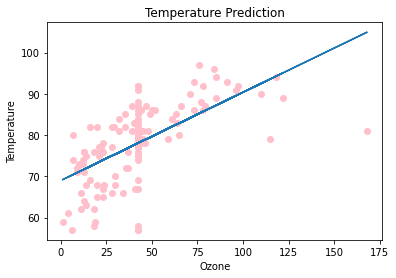

In [41]:
plt.scatter(x_train,y_train,color = "pink")
plt.plot(x_train,model.predict(x_train))
plt.title("Temperature Prediction")
plt.xlabel("Ozone")
plt.ylabel("Temperature")

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predict)
mse

59.32822191131355

In [43]:
import numpy as np
rmse = np.sqrt(mse)
rmse

7.70248154241953

In [44]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_predict)
mae

5.681535887861322

In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predict)
r2

0.2722182632528424